In [ ]:
# Acknolwledgement: referencing Stackoverflow.com and chatgpt in data interrpretability and code debugging 

In [179]:
# Importing Libraries
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [131]:
ls

Nutritional_Values.ipynb  dish_ids/                 scripts/
README                    imagery/
Untitled.ipynb            metadata/


In [132]:
pwd

'/Users/dina/Downloads/nutrition5k_dataset'

# Data Exploration

In [180]:
# we set the paths of the imagery files and subset from the metadata folder, dish_metadata_cafe1.csv
imagery_path = '/Users/dina/Downloads/nutrition5k_dataset/imagery/realsense_overhead'
metadata_path = '/Users/dina/Downloads/nutrition5k_dataset/metadata/dish_metadata_cafe1.csv'

In [181]:
# we choose to use the first six features of the columns
df_labels = pd.read_csv(metadata_path, usecols=[0, 1, 2, 3, 4, 5])

In [182]:
print(df_labels.head(20))

    dish_1561662216   300.794281  193.000000  12.387489  28.218290  18.633970
0   dish_1562688426   137.569992        88.0   8.256000   5.190000  10.297000
1   dish_1561662054   419.438782       292.0  23.838249  26.351543  25.910593
2   dish_1562008979   382.936646       290.0  22.224644  10.173570  35.345387
3   dish_1560455030    20.590000       103.0   0.148000   4.625000   0.956000
4   dish_1558372433    74.360001       143.0   0.286000   0.429000  20.020000
5   dish_1563379132   232.050003       119.0  14.280000  14.280000  10.591001
6   dish_1565640549    45.482903       139.0   1.568471   7.043886   2.641478
7   dish_1563207364   309.269989       271.0  13.774000  30.657000  15.010000
8   dish_1561575474   120.058434       183.0   4.966118  17.412746   2.990431
9   dish_1550795690    68.119995       131.0   0.262000  18.340000   0.393000
10  dish_1563216717   246.007996       332.0   5.636517  16.284782  33.068710
11  dish_1565972591   195.199997       122.0  12.200000   3.6600

In [183]:
print(df_labels.shape)

(4767, 6)


In [184]:
# we add the column names of the first six columns, from the readme of the Nutrition5k 
# https://github.com/google-research-datasets/Nutrition5k
# ['dish_id', 'total_calories', 'total_mass', 'total_fat', 'total_carb', 'total_protein']
# choosing to focus our exploration towards the identification of the nutritional facts 
# of the corresponding images of dishes with corresponding dish_id in the metadata.
# knowing the nutritionnal facts, and the caloric category of the meal  would be of great help in meal choice.
df_labels.columns = ['dish_id', 'total_calories', 'total_mass', 'total_fat', 'total_carb', 'total_protein']

In [185]:
print(df_labels.head())

           dish_id  total_calories  total_mass  total_fat  total_carb  \
0  dish_1562688426      137.569992        88.0   8.256000    5.190000   
1  dish_1561662054      419.438782       292.0  23.838249   26.351543   
2  dish_1562008979      382.936646       290.0  22.224644   10.173570   
3  dish_1560455030       20.590000       103.0   0.148000    4.625000   
4  dish_1558372433       74.360001       143.0   0.286000    0.429000   

   total_protein  
0      10.297000  
1      25.910593  
2      35.345387  
3       0.956000  
4      20.020000  


In [186]:
# we check if there are missing values
print('missing values per column:')
print(df_labels.isna().sum())

missing values per column:
dish_id           0
total_calories    0
total_mass        0
total_fat         0
total_carb        0
total_protein     0
dtype: int64


In [187]:
# we print some stats of the metadata
print('summary stats')
print(summary_stats)

summary stats
       total_calories   total_mass    total_fat   total_carb  total_protein
count     4767.000000  4767.000000  4767.000000  4767.000000    4767.000000
mean       223.964721   191.429411    11.256530    17.849535      15.198373
std        312.614376   275.075781    24.940920    29.131571      18.730203
min          0.000000     1.000000     0.000000     0.000000       0.000000
25%         60.935841    72.000000     0.616000     5.120000       1.679947
50%        154.279999   145.000000     6.483000    12.712000       8.259001
75%        324.397980   260.000000    16.066000    24.200001      22.504988
max       9485.815430  7975.000000   875.541016   844.568604     147.491821


# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

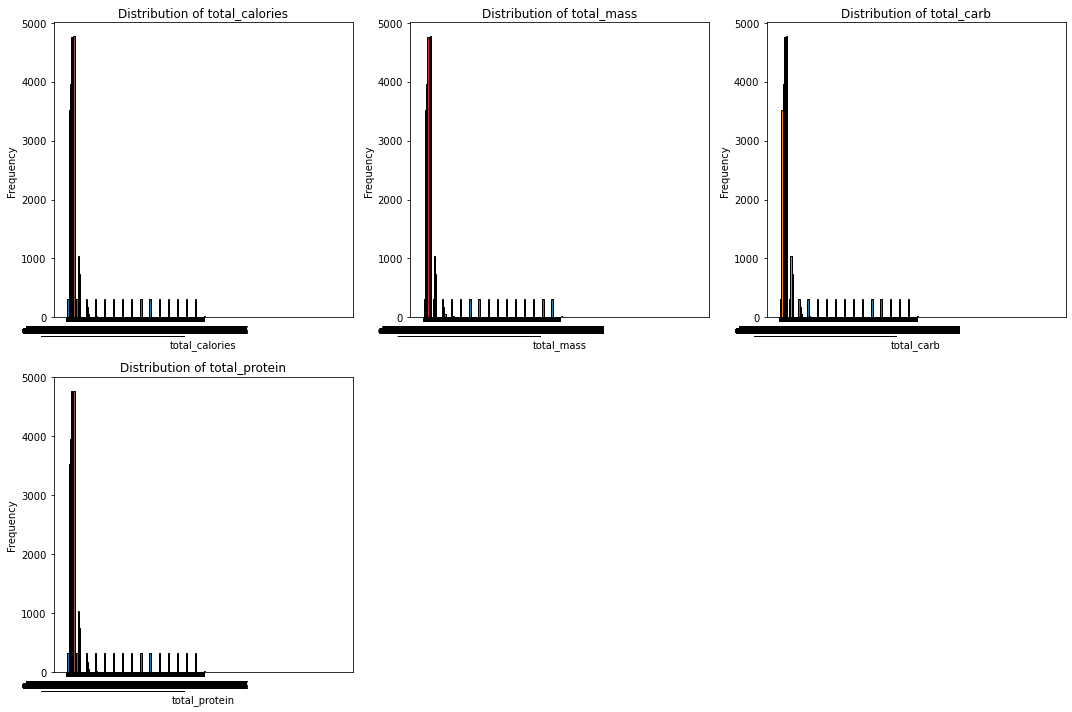

In [150]:
# We create a for loop to plot histograms for the distribution of each fearute

plt.figure(figsize=(15, 10))

for i, column in enumerate(['total_calories', 'total_mass', 'total_carb', 'total_protein'], 1):
    plt.subplot(2, 3, i)
    plt.hist(df_labels[columns], bins=30, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

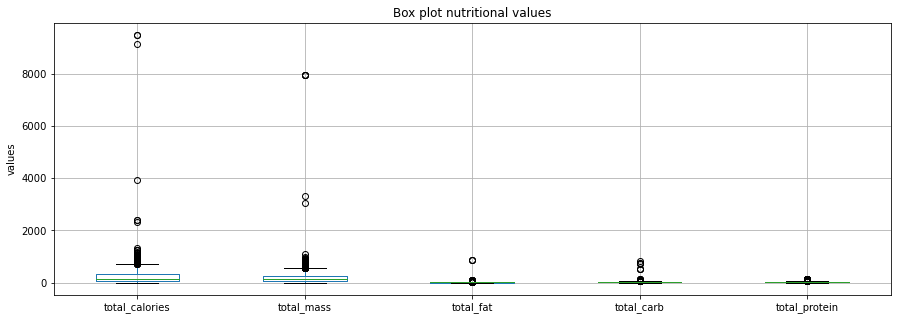

In [149]:
# we use a box plot ot all nutritional values
plt.figure(figsize=(15, 5))
df_labels[['total_calories', 'total_mass', 'total_fat', 'total_carb', 'total_protein']].boxplot()
plt.title('Box plot nutritional values')
plt.ylabel('values')
plt.show

In [152]:
# we create a correlation matrix to the different features
correlation_matrix = df_labels[['total_calories', 'total_mass', 'total_fat', 'total_carb', 'total_protein']].corr()
print(correlation_matrix)


                total_calories  total_mass  total_fat  total_carb  \
total_calories        1.000000    0.484853   0.920773    0.681952   
total_mass            0.484853    1.000000   0.332770    0.490518   
total_fat             0.920773    0.332770   1.000000    0.456154   
total_carb            0.681952    0.490518   0.456154    1.000000   
total_protein         0.622438    0.432019   0.410218    0.283299   

                total_protein  
total_calories       0.622438  
total_mass           0.432019  
total_fat            0.410218  
total_carb           0.283299  
total_protein        1.000000  


<function matplotlib.pyplot.show(close=None, block=None)>

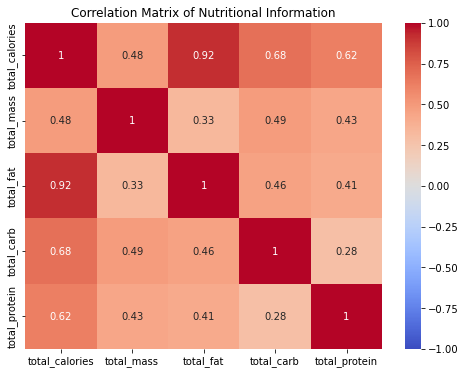

In [153]:
# we create a correlation heatmap for better visualization of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Nutritional Information')
plt.show

# Feature Engineering

In [188]:
#  we categorize the 'total_calories' feature( which is continuous data)
# into bins labeled(low, medium and high) inside a new column 'calorie_category'
df_labels['calorie_category'] = pd.cut(
    df_labels['total_calories'],
    bins=[0, 200, 500, float('inf')],
    labels=['Low', 'Medium', 'High'])



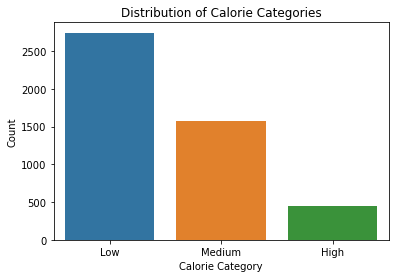

In [189]:
# we plot the distribution of the different calorie categories
sns.countplot(x='calorie_category', data=df_labels)
plt.title('Distribution of Calorie Categories')
plt.xlabel('Calorie Category')
plt.ylabel('Count')
plt.show()

# Pre-Processing

In [191]:
# We Standardize all numerical values
scaler = StandardScaler()
df_labels[['total_calories', 'toal_mass', 'total_fat', 'total_carb', 'total_protein']] = scaler.fit_transform(
    df_labels[['total_calories', 'total_mass', 'total_fat', 'total_carb', 'total_protein']])

In [195]:
df_labels

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,calorie_category,toal_mass
0,dish_1562688426,-0.276391,88.0,-0.120318,-0.434610,-0.261710,Low,-0.376043
1,dish_1561662054,0.625354,292.0,0.504514,0.291879,0.571982,Medium,0.365649
2,dish_1562008979,0.508577,290.0,0.439810,-0.263521,1.075756,Medium,0.358377
3,dish_1560455030,-0.650629,103.0,-0.445440,-0.454006,-0.760476,Low,-0.321507
4,dish_1558372433,-0.478610,143.0,-0.439907,-0.598058,0.257452,Low,-0.176077
...,...,...,...,...,...,...,...,...
4762,dish_1551139192,-0.615726,63.0,-0.448849,-0.331618,-0.794702,Low,-0.466936
4763,dish_1563382911,-0.134124,123.0,0.091164,-0.545223,-0.154760,Low,-0.248792
4764,dish_1562691737,0.837260,700.0,0.018675,1.810864,0.679617,Medium,1.849032
4765,dish_1558458496,-0.546528,77.0,-0.445200,-0.136963,-0.782742,Low,-0.416036


# Associating the images with labels

In [221]:
# we  merge the imagery/realsense_overhead folders with the df_labels dataframe 
# we create a for loop to iterate through the imagery folders and match them with the dish_id
image_data= []

for folder_name in os.listdir(imagery_path):
    folder_path = os.path.join(imagery_path, folder_name)
    
    if os.path.isdir(folder_path):
        matching_row = df_labels[df_labels['dish_id'] == folder_name]
        
        if not matching_row.empty:
            labels_info = matching_row.iloc[0].to_dict()
            
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                if file_name == 'rgb.png':
                    # Open the image and convert to RGB
                    image = Image.open(file_path).convert('RGB')
                    
                    image_data.append({'image': image, 'label_info': labels_info})


In [222]:
len(image_data)

3261

In [223]:
image_data[1]

{'image': <PIL.Image.Image image mode=RGB size=640x480 at 0x7F891FF61B20>,
 'label_info': {'dish_id': 'dish_1563468269',
  'total_calories': -0.3037757679570388,
  'total_mass': 302.0,
  'total_fat': -0.4289197153361039,
  'total_carb': 0.5119542078878618,
  'total_protein': -0.7171188851052509,
  'calorie_category': 'Low',
  'toal_mass': 0.40200627045921533}}

In [224]:
# we convert image_data to a dataframe
df_image_data = pd.DataFrame(image_data)
print(df_image_data.head())

                                               image  \
0  <PIL.Image.Image image mode=RGB size=640x480 a...   
1  <PIL.Image.Image image mode=RGB size=640x480 a...   
2  <PIL.Image.Image image mode=RGB size=640x480 a...   
3  <PIL.Image.Image image mode=RGB size=640x480 a...   
4  <PIL.Image.Image image mode=RGB size=640x480 a...   

                                          label_info  
0  {'dish_id': 'dish_1565379827', 'total_calories...  
1  {'dish_id': 'dish_1563468269', 'total_calories...  
2  {'dish_id': 'dish_1563389786', 'total_calories...  
3  {'dish_id': 'dish_1561662458', 'total_calories...  
4  {'dish_id': 'dish_1559593794', 'total_calories...  


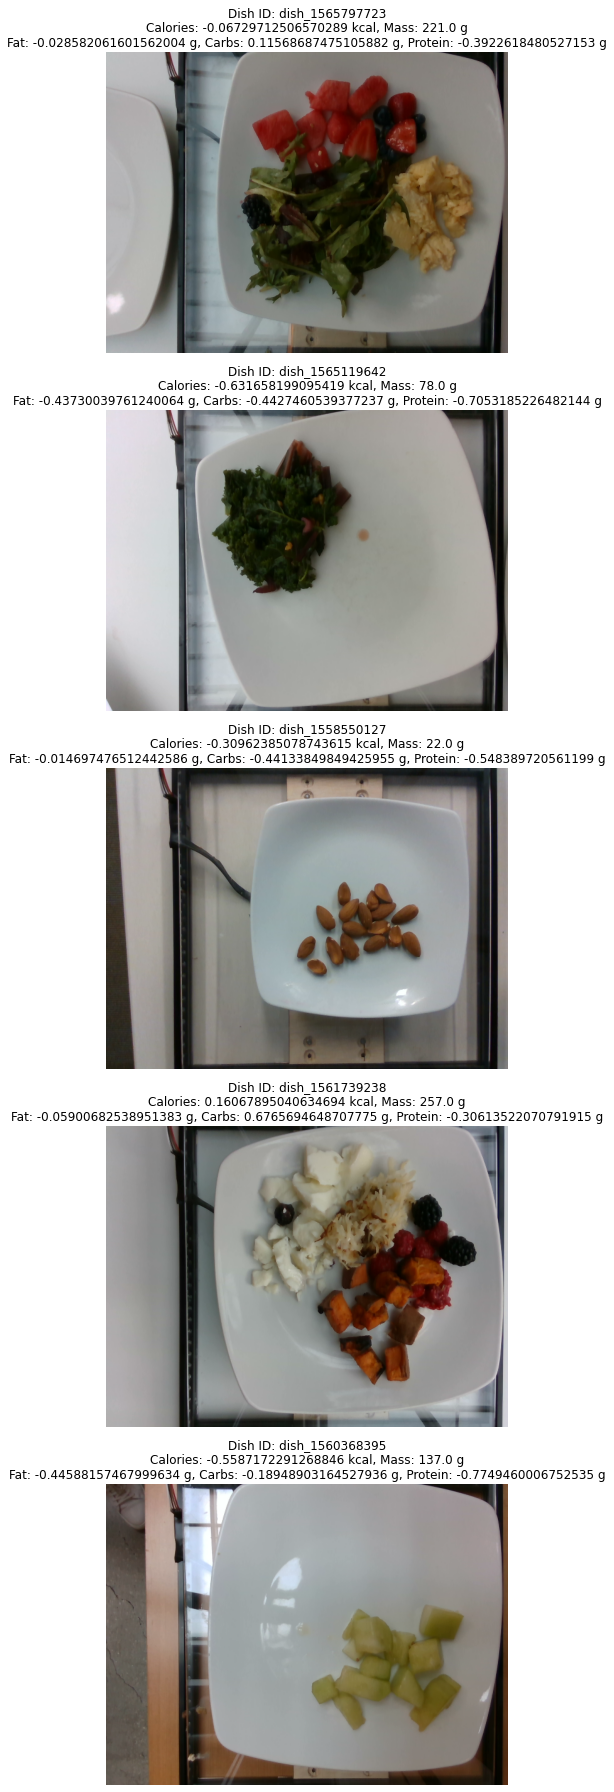

In [225]:
# we will plot random sample of images from df_image_data with their corresponding metadata to prove association
fig, axes = plt.subplots(5, 1, figsize=(10, 25))

create displayed_dishes_ids to store the sample dishes and avoid repeats

displayed_dish_ids = set()


# we create a  loop to display 5 samples with images
for i in ranges(5):
    while True:
  
        sample_row = df_image_data.sample(1).iloc[0] # we select a random row from df_image_data
        sample_dish_id = sample_row['label_info']['dish_id']
       
        
        if sample_dish_id in displayed_dish_ids:
            continue
            
        displayed_dish_ids.add(sample_dish_id)
        
        image = sample_row['image']
        label_info = sample_row['label_info']
        
        axes[i].imshow(image)
        axes[i].axis('off')
        
        title = (
             f"Dish ID: {sample_dish_id}\n"
            f"Calories: {label_info['total_calories']} kcal, "
            f"Mass: {label_info['total_mass']} g\n"
            f"Fat: {label_info['total_fat']} g, "
            f"Carbs: {label_info['total_carb']} g, "
            f"Protein: {label_info['total_protein']} g"
        )
        axes[i].set_title(title, fontsize=12)
        
        break
        
plt.tight_layout()
ply.show()

